Santo Stefano al Celio
============
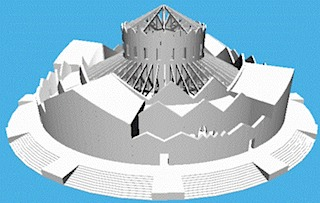

In [1]:
from larlib import *

Evaluating fenvs.py..
...fenvs.py imported in 0.010938 seconds


In [2]:
#1 cubito = 444 mm
r0 = 24; #cubiti; raggio interno del muro interno
r2 = 48; #cubiti; raggio esterno del muro medio
r3 = 72; #cubiti; raggio esterno del muro esterno
r4 = 88; #cubiti; raggio esterno scale esterne

wsteps = 10;  #cubiti; profondita' scale esterne
nsteps = 10;  #numero alzate/pedate scale esterne
wstep = wsteps/nsteps; #cubiti; larghezza pedata
hstep = 1/3; #cubiti; altezza alzata
hw4 = 29; #cubiti; altezza all'imposta del muro esterno
hbasament = hstep*nsteps;

In [24]:
### STAIRS ###

def vdom(h):
    return PROD([COMP([EMBED(1),INTERVALS(PI*3/24)])(3),QUOTE([h])])

def hdom(w):
    return COMP([S(2)(-1), EMBED(1)])(PROD([INTERVALS(PI*3/24)(3), QUOTE([w])]))

def steps(h,w):
    def steps0(n):
        return COMP([STRUCT, CAT, N(n)])([vdom(h), T(3)(h), hdom(w), T(2)(-w)])
    return steps0

stair = RIGHT([COMP([MKPOL, UKPOL])(steps(wstep, hstep)(nsteps)),COMP([S(2)(-1), SKEL_2, CUBOID])([PI/24, wsteps, hbasament])])
ramp = cylMap(T(2)(r4)(stair))
stairs = STRUCT(NN(12)([ramp, R([1,2])(PI/6)]))

### BASEMENT ###

cylMap = MAP([lambda p: p[1] * sin(p[0]), lambda p: p[1] * cos(p[0]), lambda p: p[2]])
basisSector = COMP([cylMap, EMBED(1)])(PROD([INTERVALS(2*PI/12)(4), INTERVALS(r4 - (wstep*(nsteps - 1)))(1)]))
basis = STRUCT(NN(12)([R([1,2])(2*PI/12),basisSector]))
basement = COMP([R([1,2])(PI/-48), STRUCT])([stairs, T(3)(hstep*nsteps), basis])

In [22]:
VIEW(basement)

<pyplasm.xgepy.Hpc; proxy of <Swig Object of type 'std::shared_ptr< Hpc > *' at 0x7fbd45f29240> >